### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variables are "Congruent" and "Incongruent" while the dependent variables are the observed reaction times under each column. This is because independent variables are what the experiment switches between to obeserve their effect on the dependent variables or reaction times.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

<font color='blue'>
    We need to determine that the reaction times associated with the Stroop Effect in the given dataset is enough for us to conclude that the observed difference in reaction times of the Congruent Test and and the Incongruent Test are statistically significant assuming we are willing to risk a Type I error with a probability of 0.05 or a Confidence Level of 0.95. This means that probabilty of getting the population reation times mean difference or something more extreme is less than 0.05 when we assume the null hypothesis to be true, we must reject the null hypthesis.
    <br>
    <br>
    For the null hypothesis ($h_0$) which we assume to be true, we declare that the population's reaction times mean difference of each subject ($\mu_d$) is equal to 0. In other words, there is no difference between reaction times of Congruent and Incongruent tests.
    <br>
    <br>
    For the alternative hypothesis ($h_1$), we declare that the population's reaction times mean difference of each subject ($\mu_d$) is not equal to 0. In other words, there <b>IS</b> a difference between reaction times of Congruent and Incongruent tests.
    <br>
    <br>
    We have a Type I error with a probability of 0.05 or a Confidence Level of 0.95 so $\alpha$ is set to 5%.
    <br>
    <br>
    The assumptions that we take in consideration for this test is:
    <ul> 
        <li>The population has less than 30 subjects ($n = 24$ or $df = 23$).</li>
        <li>The reaction time variables are collection from the same group in the population where the Congruent and Incongruent reaction times are dependent per subject but independent between each of the 24 subjects in the population.</li>
    </ul>
    Given the above assumptions, the sample will be t-distributed and therefore a t-test is performed because the $n = 24$ or $df = 23$ which is less than 30 which is the minimum required for a z-test. Also, the differences comes from subjects are tested twice and are dependent on one another so the specific t-test we need to perform is the paired sample t-test.
    <br>
    <br>
</font>
<font color='blue' size=5>
    Let $d$ be the difference between the reaction times for each subject and $\mu_d$ is the average of the differences.
    <br>
    <br>
    $h_0 : \mu_d= 0$
    <br>
    $h_1 : \mu_d\neq 0$
    <br>
    <br>
    $\alpha = 0.05$
</font>


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline

df = pd.read_csv('stroopdata.csv') #assign dataset to df dataframe

In [2]:
df.shape #check the number of records and columns

(24, 2)

In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
df['Congruent'].mean() - df['Incongruent'].mean()

-7.9647916666666667

<font color='blue'>
    There are 24 records with the Congruent tests have a mean reaction time of about 14 while the Incongruent tests have a mean reaction time of about 22.
    <br>
    <br>
    From the info above we can generalize that reaction times under the Congruent tests are faster on average.
    <br>
    $\mu_{congruent} - \mu_{incongruent}$ = -7.964917.
</font>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

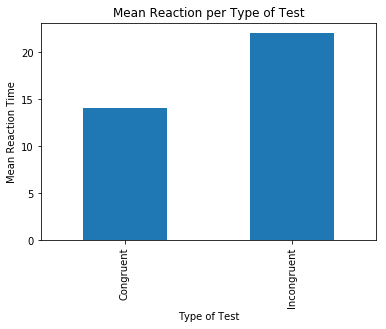

In [5]:
# Build Bar Chart of the mean reaction times per test.
df.mean().plot('bar')
plt.title('Mean Reaction per Type of Test')
plt.xlabel('Type of Test')
plt.ylabel('Mean Reaction Time');

<font color='blue'>
    Bars above visualizes the differences between the average reaction times between Congruent Test and Incongruent Tests. We can see that the Incongruent tests mean reaction times are higher than that of the Congruent Tests. The difference is -7.964917.
    <br>
    <br>
    A later test will help us determine if this is reliably different or statistically significant.
</font>

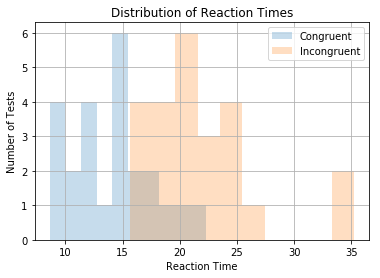

In [6]:
plt.hist(df.Congruent,alpha=0.25)
plt.hist(df.Incongruent, alpha=0.25)
plt.title('Distribution of Reaction Times')
plt.xlabel('Reaction Time')
plt.ylabel('Number of Tests')
plt.grid()
plt.legend(df)
plt.show();

<font color='blue'>
    The histogram above shows the distribution of reaction times across both tests (Congruent and Incongruent).
    <br>
    <br>
    We can see from the distribution above that the Congruent Test histogram is further left on the X-axis and less than half of it overlaps with the Incongruent Test. There are a couple of outliers in the Incongruent Test that have a much higher reaction time than the rest of the individuals.
    <br>
    <br>
    The Congruent Test as a mean just above 14 and we can see that the highest distribution is around there while the Incongruent Test has a mean of around 20 so we see the highest distribution there.
</font>

In [7]:
# Find the difference between the Congruent and Incongruent reactions times per individual. Add a new column for diff.
df['diff'] = df.Congruent - df.Incongruent
df.head()

,Congruent,Incongruent,diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


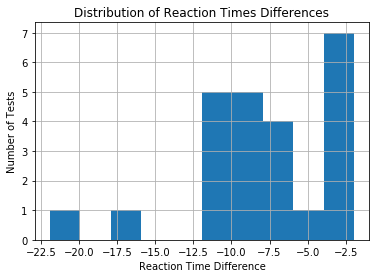

In [8]:
# build a histogram of differences between Congruent and Incongruent Reaction Times.
plt.hist(df['diff'])
plt.title('Distribution of Reaction Times Differences')
plt.xlabel('Reaction Time Difference')
plt.ylabel('Number of Tests')
plt.grid()
plt.show();

In [9]:
df['diff'].mean() # get mean of the differences between Congruent and Incongruent tests.

-7.9647916666666658

<font color='blue'>
    The difference in reaction times between Congruent and Incongruent tests have an mean difference of about -7.9648.
    <br>
    <br>
    From the histogram above they general spread between -1.95 and - 11.802 but there are a couple of outliers where the difference is much larger at -21.919 and -17.055.
</font>

<font color='blue'>
    I perform the test on myself from <a href="https://faculty.washington.edu/chudler/java/ready.html">here</a> and found that with the Congruent Test and Incongruent Test, I had a reaction time of 14.77 and 29.935 for a difference of -15.165.
<br>
<br>
    My personal reaction times are close to average for the Congruent Test but higher for the Incongruent Test.
</font>

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [10]:
congruent = df['Congruent'].values.tolist()
incongruent = df['Incongruent'].values.tolist()

In [11]:
# Perform the t-test the TWO RELATED samples
t_stat, p_value = stats.ttest_rel(congruent, incongruent)
t_stat, p_value

(-8.020706944109957, 4.1030005857111781e-08)

<font color='blue'>
    The test above shows us a t-value that is quite large at -8.0207 and a p-value that is very small at 0.00000004103.
    <br>
    <br>
    With the magnitude of the t-value this much larger than 0, there is strong evidence against the null hypthesis. And with the p-value significantly smaller than $\alpha$ (5%) when our confidence level is 95%, the Congruent and Incongruent Tests are reliably different or statistically significant.
    <br>
    <br>
    We reject the null hypothesis as a result of our test. There is a reliable difference between the Congruent Test mean reaction time and the Incongruent Test mean reaction time.
</font>

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

<font color='blue'>
    Before doing any of my own research I assumed that people have been conditioned through years of education to place greater importance to the word instead of it's color. Due to force of habit, people can't help but to read the word even if they try to just focus on the color the word is printed in.
    <br>
    <br>
    I have found a description of why this is at the <a href="https://www.verywellmind.com/what-is-the-stroop-effect-2795832">verymind.com</a> website that outlines the possible causes of the Stroop Effect as.
    <br>
    <ul>
        <li>Selective attention theory: According to this theory, naming the actual color of the words requires much more attention than simply reading the text.</li>
        <li>Speed of processing theory: This theory states that people can read words much faster than they can name colors. The speed at which we read makes it much more difficult to name the color of the word after we've read the word.</li>
        <li>Automaticity: This theory proposes that automatic reading doesn't require focused attention. Instead, the brain simply engages in it automatically. Recognizing colors, on the other hand, may be less of an automated process. While the brain registers written meaning automatically, it does require a certain amount of attentional resources to process color, making it more difficult to process color information and therefore slowing down reaction times.</li>
    </ul>
    <br>
    I think an alternative task that might produce a similar effect is if the subject were recite the number of repeating words there are in a list. In the Congruent Test, the words are repeat non-number words while the Incongruet Tests are repeating words of numbers that are not equal to the number of words in the list.
    <br>
    <br>
    For example, the Congruent Tests may have a list of ['car','car','car'] where the subject is expected to recite "three". The Incongruent Tests may have a list of repeating words of numbers that do not equal the actual number in the list. For example, ['four','four','four'] the subject is expected to recite "Three."
    <br>
    <br>
    I have found this test exists <a href="https://faculty.washington.edu/chudler/java/readyn.html">here</a>.
</font>